In [3]:
import pandas as pd
import numpy as np
import itertools


import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, f1_score


Fraud Detection with Unsupervised Learning Methods

This Jupyter Notebook explores the fascinating world of unsupervised learning for credit card fraud detection. We'll delve into a real-world dataset, uncovering hidden patterns and anomalies using powerful algorithms like Isolation Forest and Local Outlier Factor. Through careful data exploration, preprocessing, and model optimization, we aim to identify fraudulent transactions effectively. Join us as we navigate the challenges of imbalanced data and leverage the strengths of these techniques to build a robust fraud detection system.

In [4]:
creditcard = pd.read_csv('creditcard.csv')

In [5]:
print(creditcard.info())
print("-------------------------------- ")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(creditcard.size)
print("--------------------------------")


8829017
--------------------------------


In [7]:
print(creditcard.shape)
print("--------------------------------")


(284807, 31)
--------------------------------


In [8]:
print(creditcard.describe())    
print("--------------------------------")


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
print(creditcard.head())
print("--------------------------------")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Now we will check for missing values




In [10]:

print(creditcard.isnull().sum())
print("--------------------------------")

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
--------------------------------


In [6]:
# Now I want to determine the number of fraud and non-fraud transactions, as well as the percentage of fraud transactions

print(creditcard['Class'].value_counts())
print("--------------------------------")

print(creditcard['Class'].value_counts() / len(creditcard))
print("--------------------------------")
zero_amounts = creditcard['Amount'] == 0
print("Number of zero amounts:", zero_amounts.sum())




Class
0    284315
1       492
Name: count, dtype: int64
--------------------------------
Class
0    0.998273
1    0.001727
Name: count, dtype: float64
--------------------------------
Number of zero amounts: 1825


.17% of the transactions are fraudulent, which is a very low percentage. Next I want to continue to explore the relationship between the the fraud variable and the amount / time variables. 

As we can see there is 18744 rws with zero amounts. I want to remove these rows from the dataframe as transactions with zero amounts are not meaningful for our analysis, nor do they logically make sense.
To begin, I will create a new dataframe that includes the fraud and time variables. This will allow for easy exploration. 
The time variable is the number of seconds elapsed between this transaction and the first transaction in the dataset.
The Amount variable is the amount of the transaction.
The Class variable is the target variable, and indicates whether the transaction is fraudulent or not with 1 being fraudulent and 0 being non-fraudulent.

After creating the dataframe I will make a new column that is the number of hours elapsed between this transaction and the first transaction in the dataset.


In [7]:
creditcard = creditcard[creditcard['Amount'] != 0]

eda_df_1 = creditcard[['Class', 'Time', 'Amount']]

creditcard['Time_hours'] = creditcard['Time'] / 3600



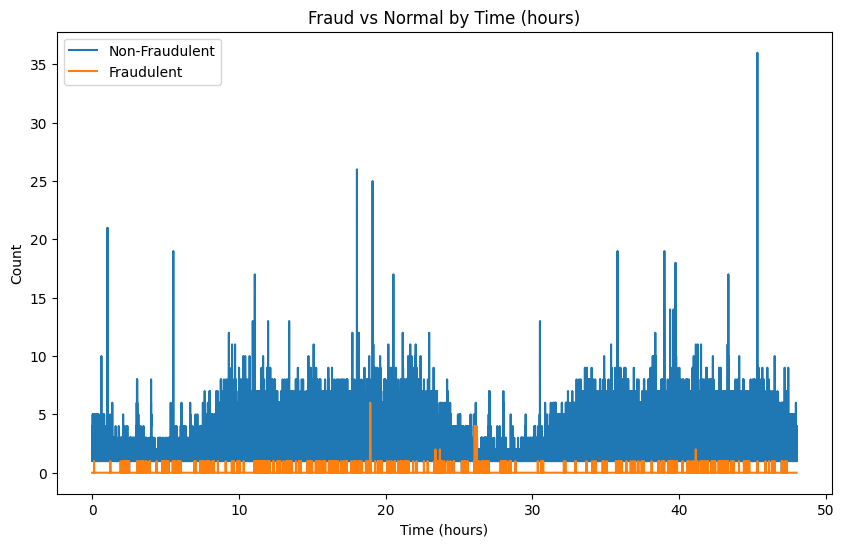

In [8]:


# Grouping the dataframe by hour and summing the number of 0's and 1's in Class
grouped_by_hour = creditcard.groupby('Time_hours')['Class'].value_counts().unstack().fillna(0).reset_index()

plt.figure(figsize=(10,6))
plt.plot(grouped_by_hour['Time_hours'], grouped_by_hour[0], label='Non-Fraudulent')
plt.plot(grouped_by_hour['Time_hours'], grouped_by_hour[1], label='Fraudulent')
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Fraud vs Normal by Time (hours)')
plt.legend()
plt.show()


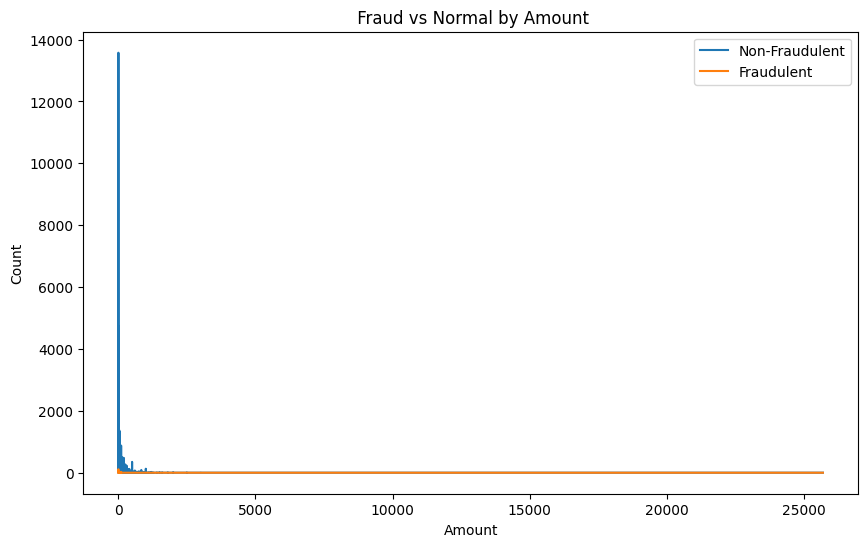

In [9]:


# Grouping the dataframe by amount and summing the number of 0's and 1's in Class
grouped_by_amount = creditcard.groupby('Amount')['Class'].value_counts().unstack().fillna(0).reset_index()

plt.figure(figsize=(10,6))
plt.plot(grouped_by_amount['Amount'], grouped_by_amount[0], label='Non-Fraudulent')
plt.plot(grouped_by_amount['Amount'], grouped_by_amount[1], label='Fraudulent')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title(' Fraud vs Normal by Amount')
plt.legend()
plt.show()



This plot above is really interesting. It shows that the vast majority of normal transactions are for amounts less than 2000, while the fraudulent transactions look very evenly spread throughout the amount range. 

next, id like to perform feature engineering on the data. I want to create a new feature that is the log of the amount. This will help to normalize the data and make it easier to model. 


In [10]:

creditcard['normalized_Amount'] = np.log(creditcard['Amount'] + 1)
print(creditcard['Amount'].head(5))




0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64


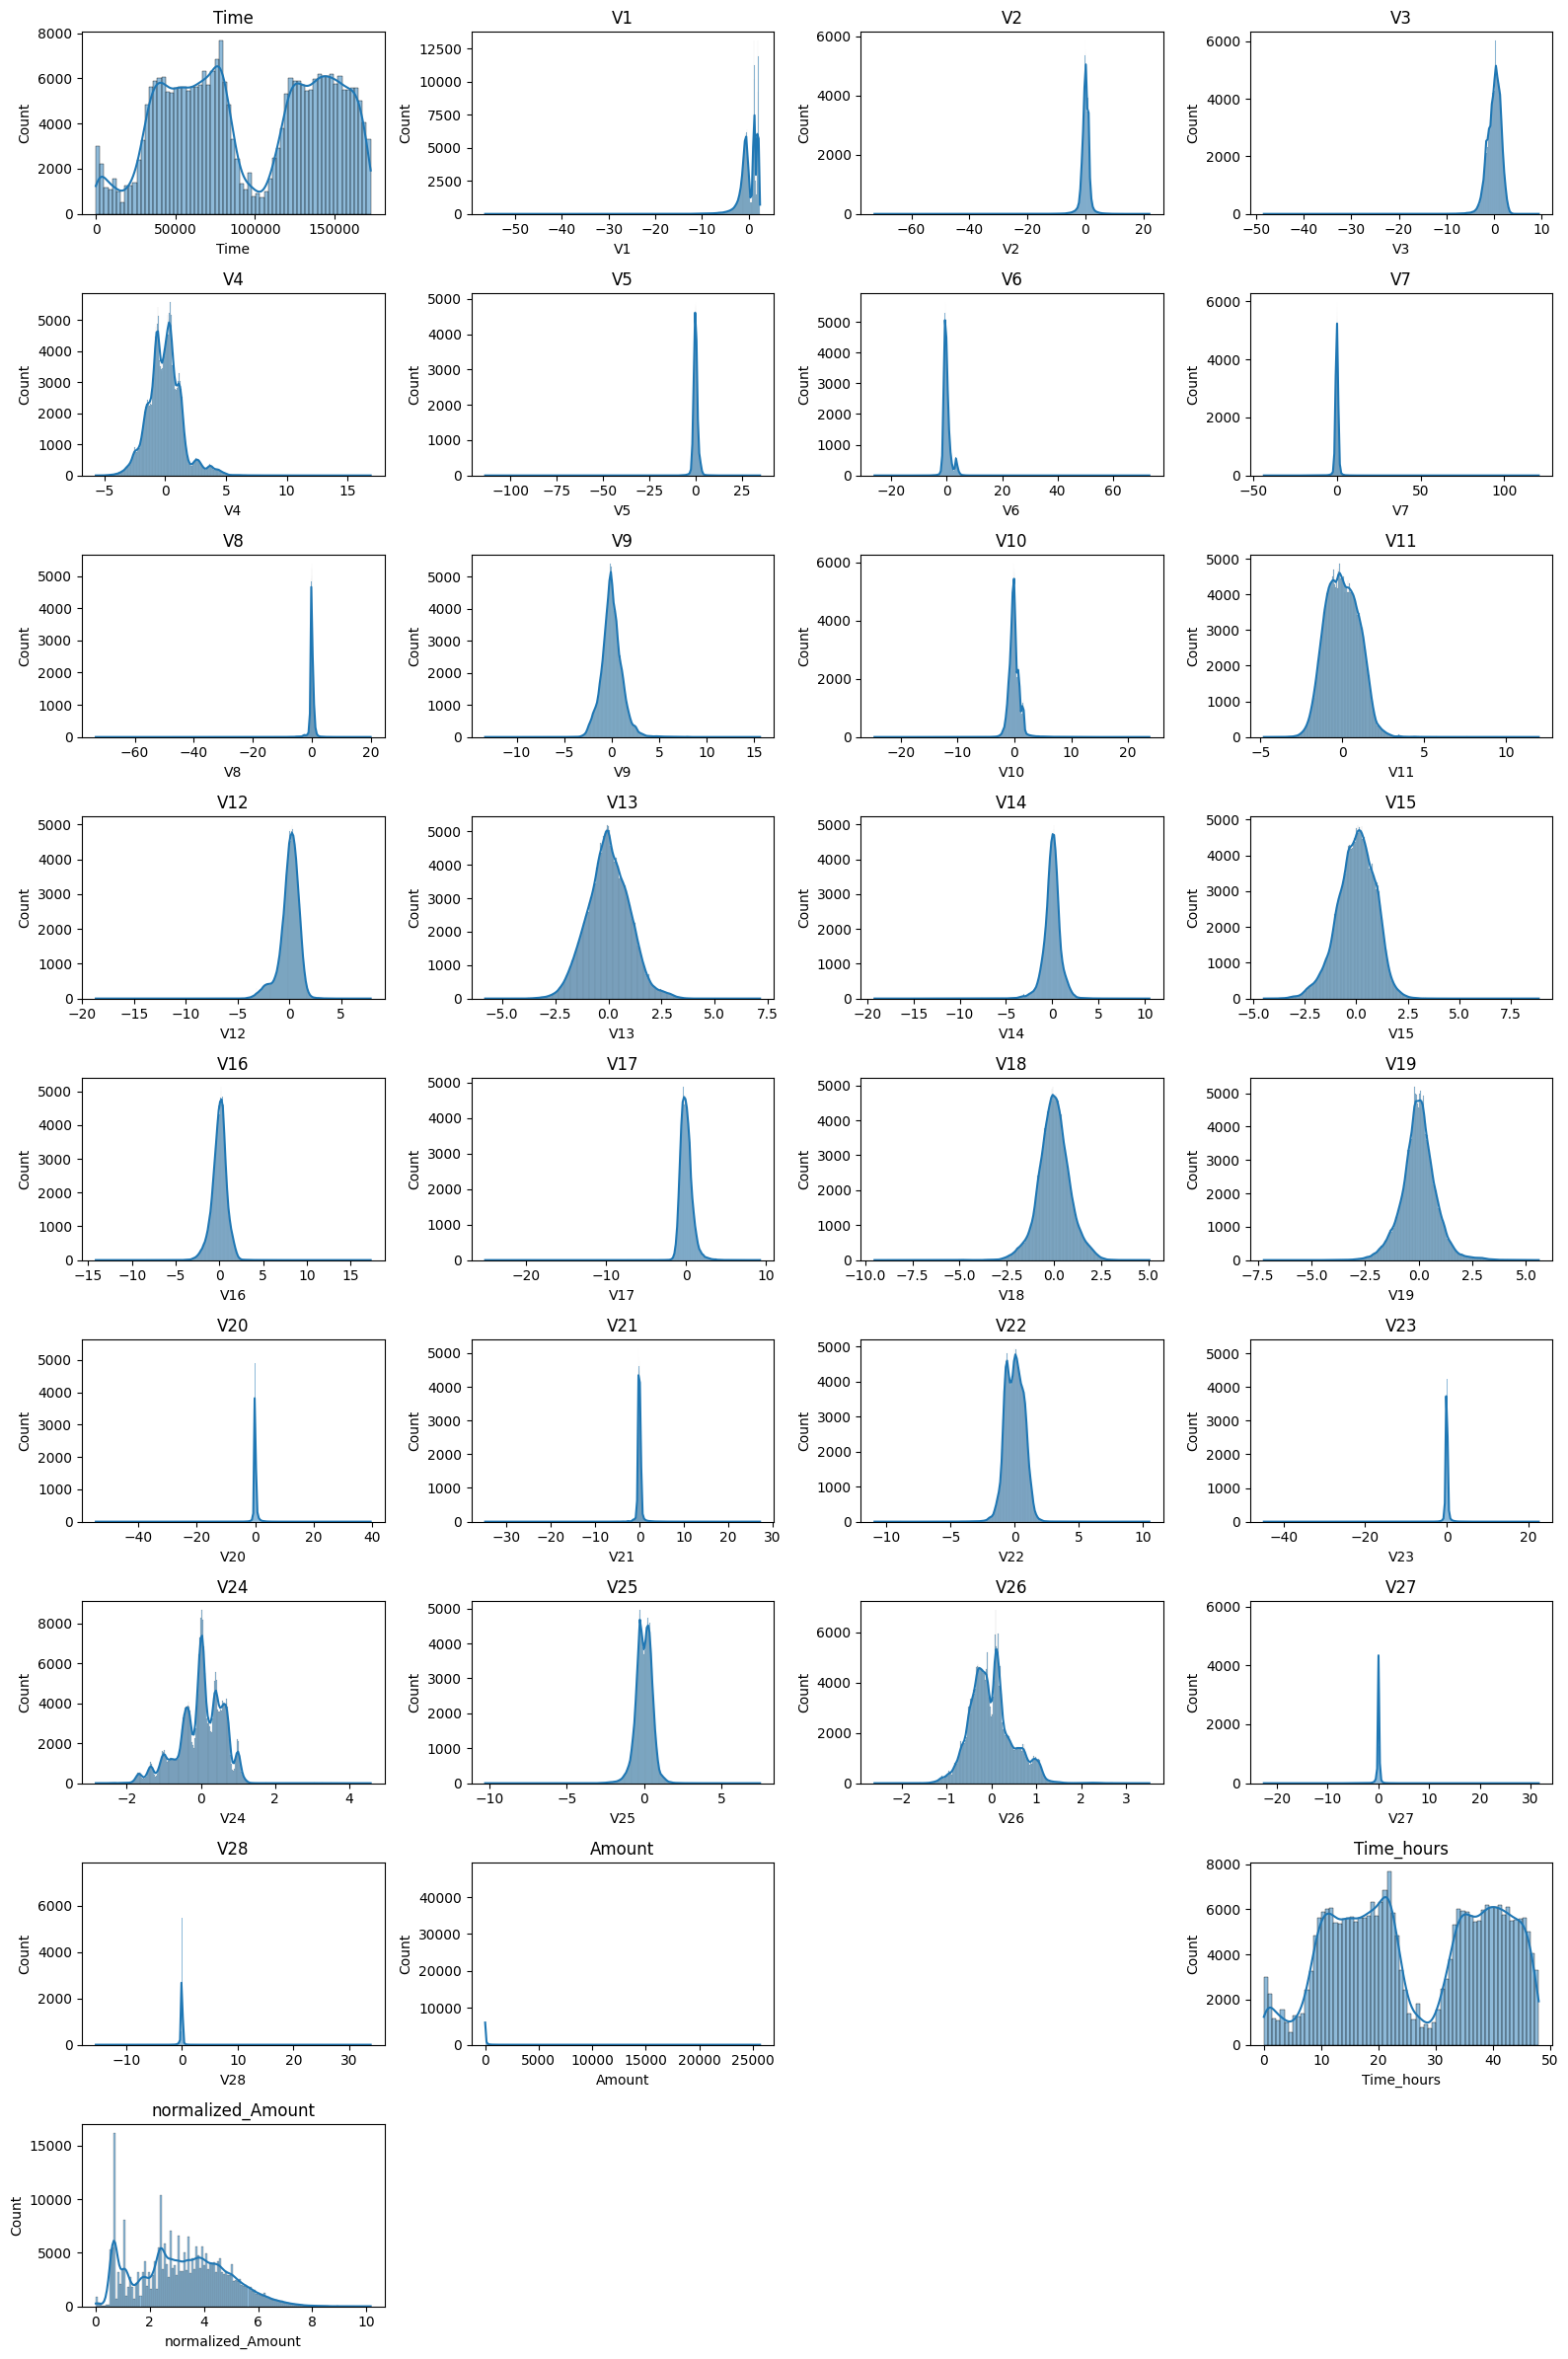

In [16]:
fig = plt.figure(figsize=(16, 24))
gs = gridspec.GridSpec(9, 4)

for i, col in enumerate(creditcard.columns):
    if col != 'Class':
        ax = fig.add_subplot(gs[i])
        sns.histplot(creditcard[col], ax=ax, kde=True)
        ax.set_title(col)

plt.tight_layout()
plt.show()


next I want to determine if the features are statistically significant. I will use the chi-square test to determine if the features are statistically significant. 


In [11]:


significance_df = pd.DataFrame(columns=['Feature', 'F-statistic', 'p-value', 'Significance'])

for col in creditcard.columns:
    if col != 'Class':
        classes = creditcard['Class'].unique()
        data = [creditcard[creditcard['Class'] == c][col] for c in classes]
        f_stat, p = f_oneway(*data)
        
        significance = "statistically significant" if p < 0.05 else "not statistically significant"
        
        significance_df = pd.concat([significance_df, pd.DataFrame({
            'Feature': [col],
            'F-statistic': [f_stat],
            'p-value': [p],
            'Significance': [significance]
        })], ignore_index=True)

print(significance_df)


C:\Users\micha\AppData\Local\Temp\ipykernel_17548\2608640107.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  significance_df = pd.concat([significance_df, pd.DataFrame({


              Feature   F-statistic        p-value  \
0                Time     47.915922   4.458347e-12   
1                  V1   2913.530025   0.000000e+00   
2                  V2   2295.142416   0.000000e+00   
3                  V3  10621.237588   0.000000e+00   
4                  V4   4868.501669   0.000000e+00   
5                  V5   2678.493291   0.000000e+00   
6                  V6    504.059762  1.557433e-111   
7                  V7  10000.500051   0.000000e+00   
8                  V8    124.030669   8.410459e-29   
9                  V9   2496.502678   0.000000e+00   
10                V10  13366.985954   0.000000e+00   
11                V11   6563.745915   0.000000e+00   
12                V12  19700.706938   0.000000e+00   
13                V13      4.477503   3.434474e-02   
14                V14  26749.930690   0.000000e+00   
15                V15      3.471936   6.241926e-02   
16                V16  11269.489135   0.000000e+00   
17                V17  33230

In [12]:
creditcard = creditcard.drop(creditcard.columns[[15, 22, 23, 25, 26]], axis=1)



Next lets split the data into training and testing sets. I want to use 80% of the data for training and 20% for testing. 
I need to ensure fraud and non-fraud are balanced in the training and testing sets. 


In [13]:


X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



LEts go with LOF

In [20]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.17)
y_pred = lof.fit_predict(X_train)

X_train_lof = X_train[y_pred == 1]
X_train_outliers = X_train[y_pred == -1]

# Convert predictions to binary format (1 for inliers, 0 for outliers)
y_pred_binary = np.where(y_pred == 1, 0, 1) 

# Calculate F1 score and ROC AUC
f1 = f1_score(y_train, y_pred_binary)
roc_auc = roc_auc_score(y_train, y_pred_binary)

print("Number of inliers: ", len(X_train_lof))
print("Number of outliers: ", len(X_train_outliers))
print("Percentage of outliers: ", len(X_train_outliers) / len(X_train) * 100, "%")
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc_auc)


Number of inliers:  375182
Number of outliers:  76845
Percentage of outliers:  17.00009070254653 %
F1 Score:  0.0
ROC AUC Score:  0.33006788881271976


In [19]:
n_neighbors_values = [5, 10, 20, 30]
#, 10, 20, 30
contamination_values = [0.1, 0.17]
#, 0.15, 0.3
lof_results = pd.DataFrame(columns=['n_neighbors', 'contamination', 'Number of inliers', 
                                  'Number of outliers', 'Percentage of outliers', 'F1 Score', 'ROC AUC'])


param_combinations = list(itertools.product(n_neighbors_values, contamination_values))

for n_neighbors, contamination in param_combinations:
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, n_jobs=-1)
    y_pred = lof.fit_predict(X_train)
    
    X_train_lof = X_train[y_pred == 1]
    X_train_outliers = X_train[y_pred == -1]
    
    # Convert predictions to binary format (1 for inliers, 0 for outliers)
    y_pred_binary = np.where(y_pred == 1, 0, 1)  
    
    f1 = f1_score(y_train, y_pred_binary)
    roc_auc = roc_auc_score(y_train, y_pred_binary)
    
   
    new_row = pd.DataFrame({
        'n_neighbors': [n_neighbors],
        'contamination': [contamination],
        'Number of inliers': [len(X_train_lof)],
        'Number of outliers': [len(X_train_outliers)],
        'Percentage of outliers': [len(X_train_outliers) / len(X_train) * 100],
        'F1 Score': [f1],
        'ROC AUC': [roc_auc]
    })
    
    lof_results = pd.concat([lof_results, new_row], ignore_index=True)

print(lof_results)

C:\Users\micha\AppData\Local\Temp\ipykernel_17548\2140193694.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lof_results = pd.concat([lof_results, new_row], ignore_index=True)


  n_neighbors  contamination Number of inliers Number of outliers  \
0           5           0.10            406824              45203   
1           5           0.17            375182              76845   
2          10           0.10            406824              45203   
3          10           0.17            375182              76845   
4          20           0.10            406824              45203   
5          20           0.17            375182              76845   
6          30           0.10            406824              45203   
7          30           0.17            375182              76845   

   Percentage of outliers  F1 Score   ROC AUC  
0               10.000066       0.0  0.400040  
1               17.000091       0.0  0.330068  
2               10.000066       0.0  0.400040  
3               17.000091       0.0  0.330068  
4               10.000066       0.0  0.400040  
5               17.000091       0.0  0.330068  
6               10.000066       0.0  0.400

In [ ]:
# Find the best parameters based on ROC AUC
best_result = lof_results.loc[lof_results['ROC AUC'].idxmax()]
print("\nBest Parameters:")
print(f"n_neighbors: {best_result['n_neighbors']}")
print(f"contamination: {best_result['contamination']}")
print(f"ROC AUC Score: {best_result['ROC AUC']:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(data=lof_results, x='n_neighbors', y='ROC AUC', hue='contamination')
plt.title('ROC AUC Scores by n_neighbors and Contamination')
plt.xlabel('Number of Neighbors')
plt.ylabel('ROC AUC Score')
plt.legend(title='Contamination')
plt.show()


Now I'm going to make the next model, the isolation forest model. 

In [14]:


# contamination=0.17, 
iso_forest = IsolationForest(random_state=42, n_jobs=-1)
y_pred_if = iso_forest.fit_predict(X_train)


y_pred_if_binary = [1 if x == -1 else 0 for x in y_pred_if] 
y_scores = -iso_forest.score_samples(X_train)  

roc_auc = roc_auc_score(y_train, y_pred_if_binary)
f1 = f1_score(y_train, y_pred_if_binary)

X_train_if = X_train[y_pred_if == 1] 
X_train_outliers_if = X_train[y_pred_if == -1]  

# Print results
print("Number of inliers:", len(X_train_if))
print("Number of outliers:", len(X_train_outliers_if))
print("Percentage of outliers:", len(X_train_outliers_if) / len(X_train) * 100, "%")
print("ROC-AUC Score:", roc_auc)
print("F1 Score:", f1)


if_results = pd.DataFrame({
    'contamination': [0.1],
    'Number of inliers': [len(X_train_if)],
    'Number of outliers': [len(X_train_outliers_if)],
    'Percentage of outliers': [len(X_train_outliers_if) / len(X_train) * 100],
    'ROC-AUC': [roc_auc],
    'F1 Score': [f1]
})

print("\nIsolation Forest Results:")
print(if_results)


Number of inliers: 388034
Number of outliers: 63993
Percentage of outliers: 14.15689770743783 %
ROC-AUC Score: 0.6264988960717779
F1 Score: 0.41787420450821794

Isolation Forest Results:
   contamination  Number of inliers  Number of outliers  \
0            0.1             388034               63993   

   Percentage of outliers   ROC-AUC  F1 Score  
0               14.156898  0.626499  0.417874  


Now we're going to iterate through the n_estimators from 100 to 1000

In [15]:
# Create empty DataFrame to store results
if_results_n_estimators = pd.DataFrame()

# Iterate through different n_estimators values
for n_est in range(100, 1100, 100):
    
    iso_forest = IsolationForest(n_estimators=n_est, random_state=42, n_jobs=-1)
    y_pred_if = iso_forest.fit_predict(X_train)
    
    
    y_pred_if_binary = [1 if x == -1 else 0 for x in y_pred_if]
    y_scores = -iso_forest.score_samples(X_train)
    
    
    roc_auc = roc_auc_score(y_train, y_pred_if_binary)
    f1 = f1_score(y_train, y_pred_if_binary)
    
    
    X_train_if = X_train[y_pred_if == 1]
    X_train_outliers_if = X_train[y_pred_if == -1]
    
   
    temp_results = pd.DataFrame({
        'n_estimators': [n_est],
        'Number of inliers': [len(X_train_if)],
        'Number of outliers': [len(X_train_outliers_if)],
        'Percentage of outliers': [len(X_train_outliers_if) / len(X_train) * 100],
        'ROC-AUC': [roc_auc],
        'F1 Score': [f1]
    })
    
    
    if_results_n_estimators = pd.concat([if_results_n_estimators, temp_results], ignore_index=True)

print("Isolation Forest Results for different n_estimators:")
print(if_results_n_estimators)


Isolation Forest Results for different n_estimators:
   n_estimators  Number of inliers  Number of outliers  \
0           100             388034               63993   
1           200             387769               64258   
2           300             389324               62703   
3           400             389922               62105   
4           500             389887               62140   
5           600             389996               62031   
6           700             389906               62121   
7           800             389904               62123   
8           900             390448               61579   
9          1000             390506               61521   

   Percentage of outliers   ROC-AUC  F1 Score  
0               14.156898  0.626499  0.417874  
1               14.215523  0.627953  0.420670  
2               13.871517  0.624931  0.412819  
3               13.739224  0.624126  0.410337  
4               13.746966  0.624168  0.410474  
5               13.7


Best n_estimators value: 200


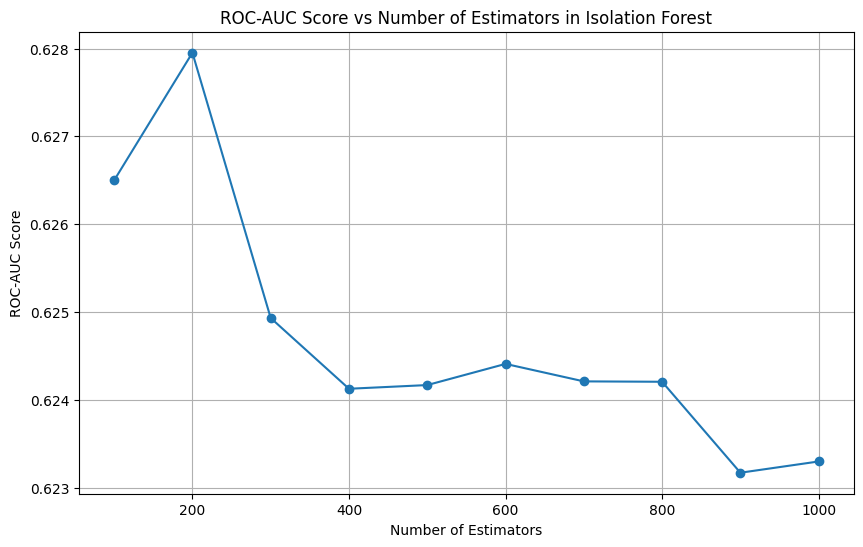

In [17]:
# Find the best n_estimators based on ROC-AUC score
best_n_estimators = if_results_n_estimators.loc[if_results_n_estimators['ROC-AUC'].idxmax(), 'n_estimators']
print(f"\nBest n_estimators value: {best_n_estimators}")

plt.figure(figsize=(10, 6))
plt.plot(if_results_n_estimators['n_estimators'], if_results_n_estimators['ROC-AUC'], marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score vs Number of Estimators in Isolation Forest')
plt.grid(True)
plt.show()


Model Comparison:
                   Metric           LOF  Isolation Forest
0           ROC-AUC Score      0.400040          0.627953
1      Number of Outliers  45203.000000      64258.000000
2  Percentage of Outliers     10.000066         14.215523


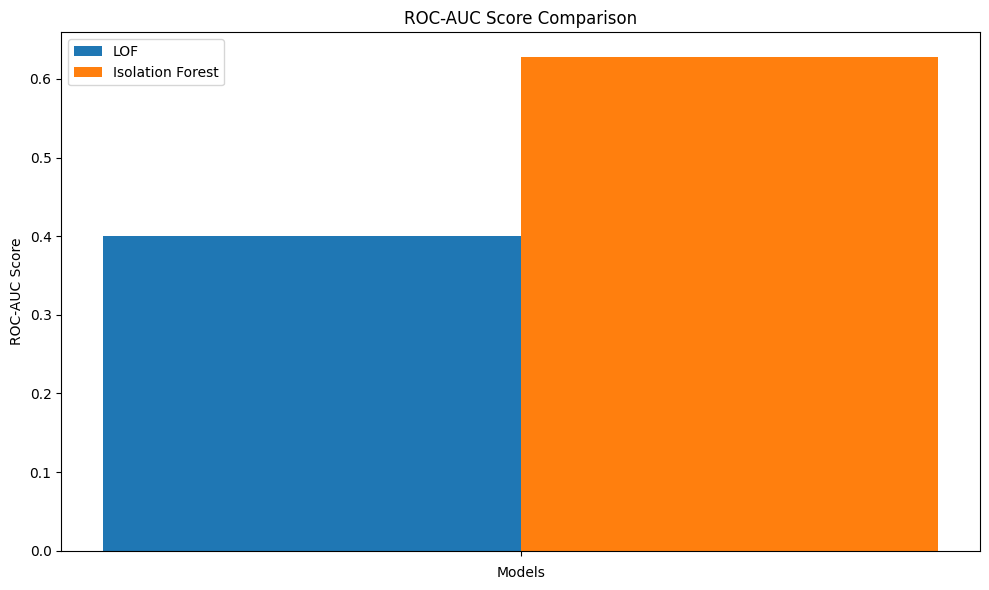

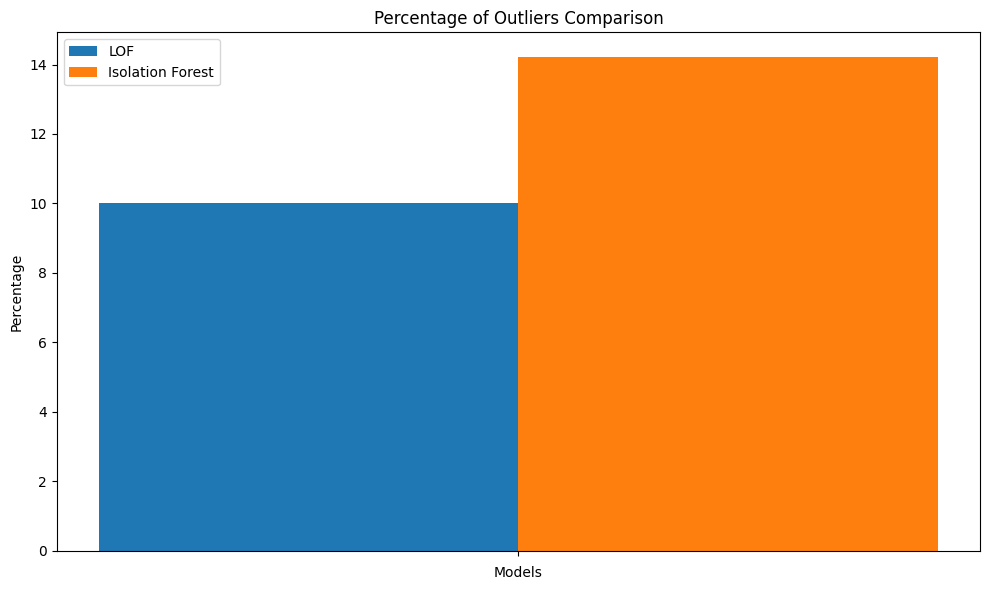

In [21]:
# Get best results from each model
best_lof = lof_results.loc[lof_results['ROC AUC'].idxmax()]
best_if = if_results_n_estimators.loc[if_results_n_estimators['ROC-AUC'].idxmax()]


comparison_df = pd.DataFrame({
    'Metric': ['ROC-AUC Score', 'Number of Outliers', 'Percentage of Outliers'],
    'LOF': [best_lof['ROC AUC'], 
            best_lof['Number of outliers'], 
            best_lof['Percentage of outliers']],
    'Isolation Forest': [best_if['ROC-AUC'], 
                        best_if['Number of outliers'], 
                        best_if['Percentage of outliers']]
})

print("Model Comparison:")
print(comparison_df)

# Plot ROC-AUC comparison
plt.figure(figsize=(10, 6))
roc_auc_data = comparison_df[comparison_df['Metric'] == 'ROC-AUC Score']
x = np.arange(1)
width = 0.35

plt.bar(x - width/2, roc_auc_data['LOF'], width, label='LOF')
plt.bar(x + width/2, roc_auc_data['Isolation Forest'], width, label='Isolation Forest')
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score Comparison')
plt.xticks(x, [''])
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
outlier_data = comparison_df[comparison_df['Metric'] == 'Percentage of Outliers']
x = np.arange(1)

plt.bar(x - width/2, outlier_data['LOF'], width, label='LOF')
plt.bar(x + width/2, outlier_data['Isolation Forest'], width, label='Isolation Forest')
plt.xlabel('Models')
plt.ylabel('Percentage')
plt.title('Percentage of Outliers Comparison')
plt.xticks(x, [''])
plt.legend()
plt.tight_layout()
plt.show() 